In [44]:
import pandas as pd
from dotenv import load_dotenv
import os
import time
import json
import requests
import matplotlib.pyplot as plt

In [45]:
# Get the fred api key
load_dotenv("keys.env")
fred_api_key = os.getenv("FRED_API_KEY")

In [46]:

df_dict = {"income": "", "house": "", "minimum wage": ""}
series_id_list = ["NCPCPI", "NCSTHPI", "STTMINWGNC"]
for id in series_id_list:
    response = requests.get(f"https://api.stlouisfed.org/fred/series/observations?series_id={id}&api_key={fred_api_key}&file_type=json")
    data = response.json()
    df = pd.DataFrame(data['observations'])

    if id == "NCPCPI":
        df_dict['income'] = df
    elif id == "NCSTHPI":
        df_dict['house'] = df
    elif id == "STTMINWGNC":
        df_dict['minimum wage'] = df

KeyError: 'observations'

In [47]:
df = pd.DataFrame(data['observations'])
df

KeyError: 'observations'

In [48]:
# Read the CSV files into DataFrames.
UnemploymentRate_df = pd.read_csv('UnemploymentRate.csv')


In [49]:
# Display the Unemployment Rate DataFrame
UnemploymentRate_df.head(15)

,Area Name,Year,Month,Adjusted,Labor Force,Employed,Unemployed,Unemployment Rate(%),Labor Force Participation Rate(%),Employment to Population Rate(%)
0,North Carolina,1980,1,Not Seasonally Adjusted,2788405,2634738,153667,5.5,65.6,62.0
1,North Carolina,1980,2,Not Seasonally Adjusted,2815303,2643849,171454,6.1,66.1,62.0
2,North Carolina,1980,3,Not Seasonally Adjusted,2811899,2652053,159846,5.7,65.9,62.1
3,North Carolina,1980,4,Not Seasonally Adjusted,2827282,2670416,156866,5.5,66.1,62.4
4,North Carolina,1980,5,Not Seasonally Adjusted,2865216,2684502,180714,6.3,66.9,62.6
5,North Carolina,1980,6,Not Seasonally Adjusted,2896804,2682762,214042,7.4,67.5,62.5
6,North Carolina,1980,7,Not Seasonally Adjusted,2928082,2692601,235481,8.0,68.1,62.7
7,North Carolina,1980,8,Not Seasonally Adjusted,2911515,2708467,203048,7.0,67.6,62.9
8,North Carolina,1980,9,Not Seasonally Adjusted,2850045,2672727,177318,6.2,66.1,62.0
9,North Carolina,1980,10,Not Seasonally Adjusted,2863074,2680427,182647,6.4,66.3,62.1


In [50]:
# Check the Unemployment Rate data types.
UnemploymentRate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Area Name                          534 non-null    object 
 1   Year                               534 non-null    int64  
 2   Month                              534 non-null    int64  
 3   Adjusted                           534 non-null    object 
 4   Labor Force                        534 non-null    int64  
 5   Employed                           534 non-null    int64  
 6   Unemployed                         534 non-null    int64  
 7   Unemployment Rate(%)               534 non-null    float64
 8   Labor Force Participation Rate(%)  534 non-null    float64
 9   Employment to Population Rate(%)   534 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 41.8+ KB


In [51]:
# Check if any values are null.
UnemploymentRate_df.isnull().sum()

Area Name                            0
Year                                 0
Month                                0
Adjusted                             0
Labor Force                          0
Employed                             0
Unemployed                           0
Unemployment Rate(%)                 0
Labor Force Participation Rate(%)    0
Employment to Population Rate(%)     0
dtype: int64

In [19]:
# Show the unemployment rate for every 20 years using groupby
UnemploymentRate_df['20YearPeriod'] = (UnemploymentRate_df['Year'] // 20) * 20
unemployment_by_period = UnemploymentRate_df.groupby('20YearPeriod')['Unemployment Rate(%)'].mean().reset_index()

# Rename columns
unemployment_by_period.columns = ['Start Year', 'Average Unemployment Rate']

print("\nAverage unemployment rate for each 20-year period:")
print(unemployment_by_period)


Average unemployment rate for each 20-year period:
   Start Year  Average Unemployment Rate
0        1980                   5.273333
1        2000                   6.470417
2        2020                   4.694444


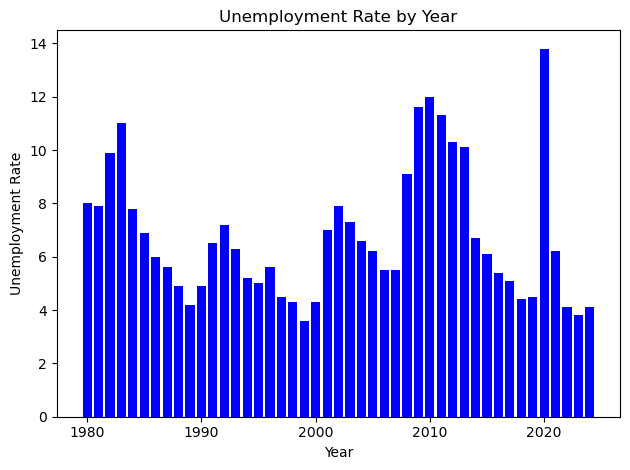

In [24]:
# Bar chart that shows unemployment rate by year
plt.bar(UnemploymentRate_df['Year'], UnemploymentRate_df['Unemployment Rate(%)'], color='blue')


plt.title('Unemployment Rate by Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()

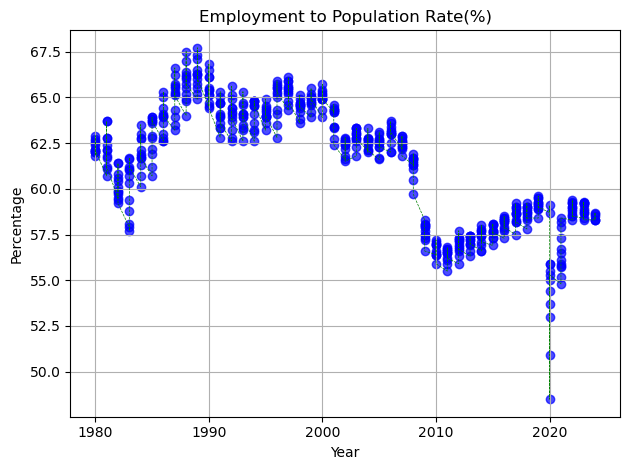

In [42]:
# Scatter plot showing employment to populatoin rate by year
plt.scatter(UnemploymentRate_df['Year'], UnemploymentRate_df['Employment to Population Rate(%)'], color='blue', alpha=0.7)

plt.plot(UnemploymentRate_df['Year'], UnemploymentRate_df['Employment to Population Rate(%)'], color='g', linestyle='--', linewidth=1.0, alpha=1.0, label='Trend Line')

plt.title('Employment to Population Rate(%)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(True)

plt.tight_layout()
plt.show()


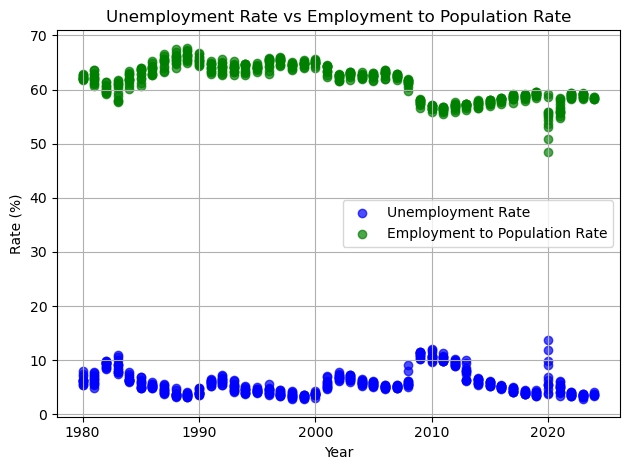

In [43]:
# Scatter plot showing comparison between unemployment rate and employment to populatoin rate by year 
plt.scatter(UnemploymentRate_df['Year'], UnemploymentRate_df['Unemployment Rate(%)'], color='b', alpha=0.7, label='Unemployment Rate')
plt.scatter(UnemploymentRate_df['Year'], UnemploymentRate_df['Employment to Population Rate(%)'], color='g', alpha=0.7, label='Employment to Population Rate')

plt.title('Unemployment Rate vs Employment to Population Rate')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
